In [1]:
from Scripts.Make_logistic import *
import numpy as np
import matplotlib.pyplot as  plt
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE" 

In [2]:

asthma_7_exposure = az.from_netcdf("Models/asthma_adjusted_7y.nc")
asthma_12_exposure = az.from_netcdf("Models/asthma_adjusted_12y.nc")
asthma_18_exposure = az.from_netcdf("Models/asthma_adjusted_18y.nc")

In [3]:
new_labels=asthma_12_exposure.posterior.weight_dim_0.values

In [4]:
axes = az.plot_forest(
    [asthma_12_exposure,asthma_18_exposure],filter_vars="regex", hdi_prob=0.01,quartiles=True,model_names = ["12 years","18 years"],combined=True,ridgeplot_quantiles=[0.05,0.95], var_names="^weight",rope=[0.999,1.001])

axes[0].set_title('Asthma Odds ratio pr standard deviation',fontsize=15)
fig = plt.gcf() 
for ax in axes:
    new_labels = [label.get_text().replace("weight",'').replace('[', '').replace(']', '') 
                  for label in ax.get_yticklabels()]
    ax.set_yticklabels(new_labels)
# 3. Save the figure to a file
# Use .png, .pdf, .svg, etc. as the extension
fig.savefig("Plots/multiple_coerf_adjusted.png",dpi=300,bbox_inches='tight')


# Optional: Close the plot to prevent it from displaying in some environments
plt.close(fig)

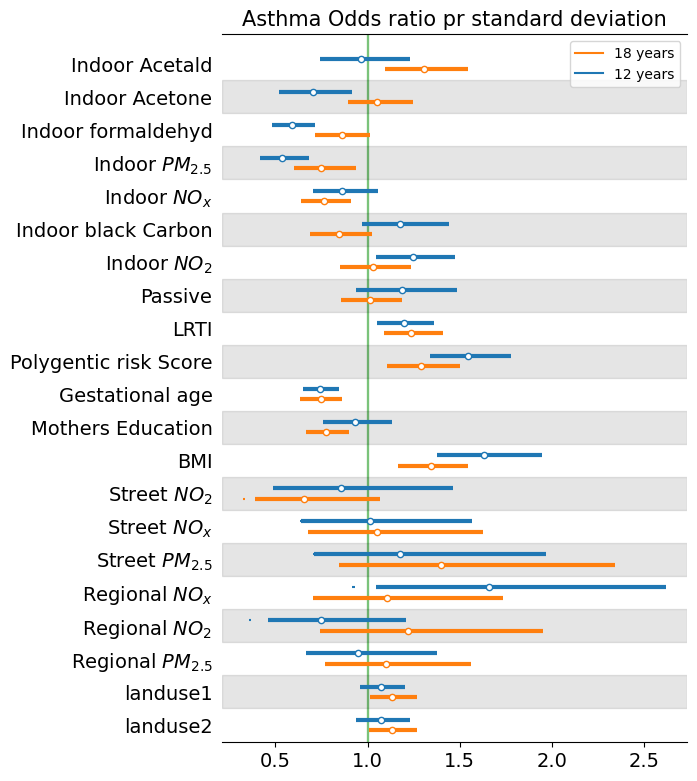

In [5]:
fig

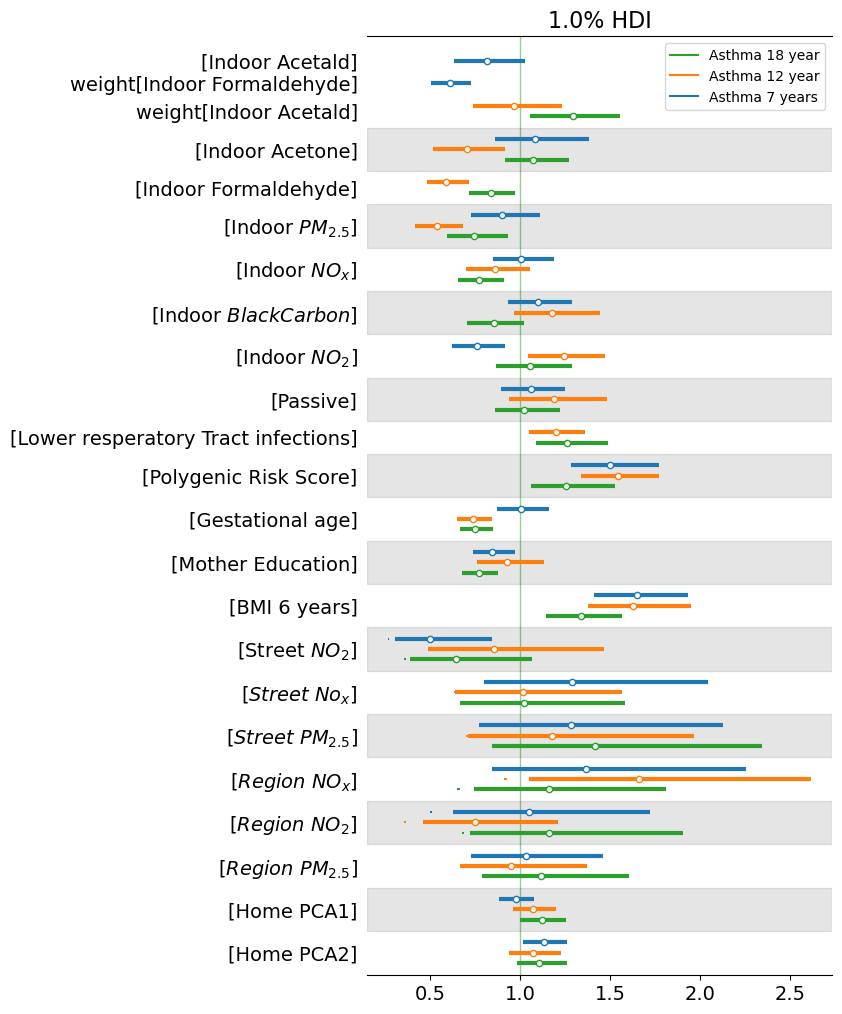

In [8]:
ax = az.plot_forest(
    [asthma_7_exposure, asthma_12_exposure, asthma_18_exposure],
    hdi_prob=0.01,
    quartiles=True,
    model_names=["Asthma 7 years", "Asthma 12 year", "Asthma 18 year"],
    combined=True,
    ridgeplot_quantiles=[0.05, 0.95],
    rope=[0.999, 1.001],
    var_names="^weight",  # Selects variables starting with "weight"
    filter_vars="regex"   # Tells ArviZ to use the above as a regular expression
)

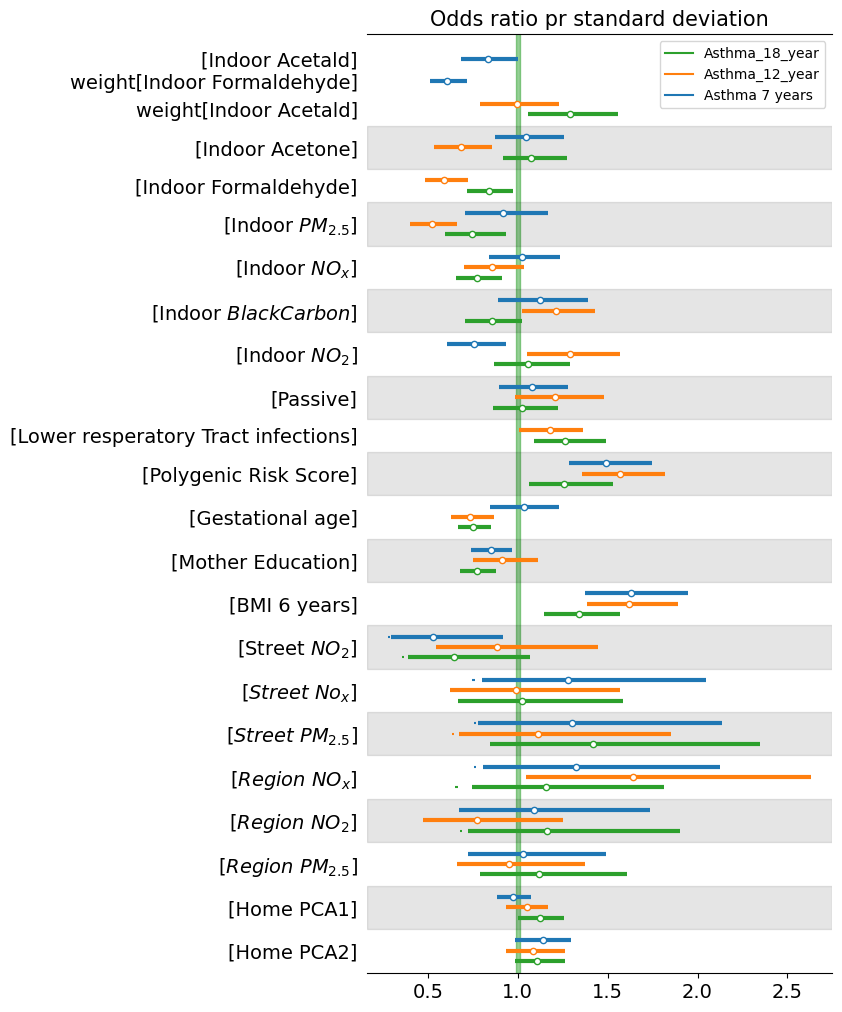

In [7]:
fig

In [5]:
az.plot_compare(model_compare, insample_dev=True)

NameError: name 'model_compare' is not defined

In [62]:
import shap

In [63]:
df.columns

Index(['acetald_season_m18', 'acetone_season_m18', 'form_season_m18',
       'pm25_season_m18', 'nox_season_m18', 'bc_season_m18', 'no2_season_m18',
       'passive_m18', 'lrti_1y', 'genetic_risk_score_asthma',
       'gestational_age', 'mother's_education_1yr', 'bmi_6_yrs', 'nox_urb_m18',
       'no2_urb_m18', 'o3_urb_m18', 'co_urb_m18', 'so2_urb_m18',
       'pm10_urb_m18', 'pm25_urb_m18', 'pmdust_urb_m18', 'ec_urb_m18',
       'oc_urb_m18', 'nox_sn07_m18', 'no2_sn07_m18', 'o3_sn07_m18',
       'co_sn07_m18', 'so2_sn07_m18', 'pm10_sn07_m18', 'pm25_sn07_m18',
       'ec_sn07_m18', 'oc_sn07_m18', 'pm10_0ntp_m18', 'pm25_0ntp_m18',
       'nox_sn02_m18', 'no2_sn02_m18', 'o3_sn02_m18', 'co_sn02_m18',
       'so2_sn02_m18', 'pm10_sn02_m18', 'pm25_sn02_m18', 'ec_sn02_m18',
       'oc_sn02_m18', 'no2_str_m18', 'nox_str_m18', 'o3_str_m18', 'co_str_m18',
       'pm10_str_m18', 'pm25_str_m18', 'asthma_0_7yrs', 'verificeret_12y',
       'verificeret_18y'],
      dtype='object')

In [93]:
df = pd.read_excel('../Data/Data_all_time.xlsx', index_col=0)
X_0=df.loc[:,['acetald_season_m18', 'acetone_season_m18', 'form_season_m18',
       'pm25_season_m18', 'nox_season_m18', 'bc_season_m18', 'no2_season_m18','genetic_risk_score_asthma', 'gestational_age',
       'no2_str_m18', 'nox_str_m18', 'pm25_str_m18']]
X=df.loc[:,['lrti_1y','acetald_season_m18', 'acetone_season_m18', 'form_season_m18',
       'pm25_season_m18', 'nox_season_m18', 'bc_season_m18', 'no2_season_m18','genetic_risk_score_asthma', 'gestational_age',
       'no2_str_m18', 'nox_str_m18', 'pm25_str_m18']]

In [132]:
s7=pd.read_excel("shap7.xlsx", index_col=0)
s12=pd.read_excel("shap12.xlsx", index_col=0)
s18=pd.read_excel("shap18.xlsx", index_col=0)

In [95]:
X

,lrti_1y,acetald_season_m18,acetone_season_m18,form_season_m18,pm25_season_m18,nox_season_m18,bc_season_m18,no2_season_m18,genetic_risk_score_asthma,gestational_age,no2_str_m18,nox_str_m18,pm25_str_m18
1,-0.468348,0.158000,1.266562,-0.326627,-0.719408,-0.372627,-0.556513,-0.189845,0.089911,0.241047,-1.271516,-0.842286,-0.445187
3,-0.468348,-0.025938,-0.042208,0.153661,3.098117,10.329990,0.201867,5.122227,-1.092242,-0.060568,0.620946,0.268760,0.280107
4,-0.468348,-0.282588,-0.253465,0.322095,0.511959,-0.351159,0.007261,-0.766862,1.632720,-0.261645,-0.314858,-0.323772,-0.248535
5,-0.468348,0.155130,0.172504,-0.368279,-0.538218,0.027910,-0.567530,0.097914,-0.310819,-0.261645,-0.820076,-0.639158,-0.409966
7,-0.468348,0.536839,1.076798,2.958837,1.365320,0.511911,0.110948,-0.516821,-1.402807,-0.965412,-0.057243,-0.216034,-0.071898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,-0.468348,-0.819100,-0.848213,0.057965,-0.052745,-0.479954,0.011479,-0.650245,1.432355,0.140508,-0.429622,-0.442046,0.252210
450,-0.468348,-1.227496,-1.005646,0.436408,0.000282,-0.559879,-0.037215,-0.801885,0.310312,-0.563259,-0.303355,-0.386357,0.682245
451,1.042960,-0.357199,-0.332161,0.004707,0.586525,-0.244309,2.318864,-0.230790,0.200112,-2.775100,0.221859,0.209366,1.299316
452,-0.468348,0.681869,0.052266,-0.672787,0.036148,0.378740,1.269074,0.763894,-0.080399,-0.864874,-0.040286,-0.266076,0.775398


In [130]:
list_parameters=["Infection","Indoor Acetald","Indoor Acetone","Indoor formaldehyd","Indoor $PM_{2.5}$","Indoor $NO_x$","Indoor black Carbon","Indoor $NO_2$","Genetics","Gestational age","Outdoor $NO_2$","Outdoor $NO_x$","Outdoor $PM_{2.5}$"]
replace_dict=dict(zip(X.columns,list_parameters))
X=X.rename(columns=replace_dict)

In [97]:
list_parameters=["Indoor Acetald","Indoor Acetone","Indoor formaldehyd","Indoor $PM_{2.5}$","Indoor $NO_x$","Indoor black Carbon","Indoor $NO_2$","Genetics","Gestational age","Outdoor $NO_2$","Outdoor $NO_x$","Outdoor $PM_{2.5}$"]


In [102]:
replace_dict=dict(zip(X_0.columns,list_parameters))
X_0=X_0.rename(columns=replace_dict)

In [118]:
replace_dict_7=dict(zip(X_0.columns,X_0.columns+"_7y"))
X_7=X_0.rename(columns=replace_dict_7)
replace_dict_12=dict(zip(X.columns,X.columns+"_12y"))
X_12=X.rename(columns=replace_dict_12)
replace_dict_18=dict(zip(X.columns,X.columns+"_18y"))
X_18=X.rename(columns=replace_dict_18)

In [119]:
X_total=pd.concat([X_7,X_12,X_18],axis=1)

In [133]:
s=(s12+s18)/2

In [121]:
s=np.concatenate((s7,s12,s18),axis=1)

/data/michaelf/miniconda3/lib/python3.10/site-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #5 for feature Infection, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/data/michaelf/miniconda3/lib/python3.10/site-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #7 for feature Infection, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/data/michaelf/miniconda3/lib/python3.10/site-packages/shap/plots/_violin.py:304: UserWarning: Not enough data in bin #8 for feature Infection, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(


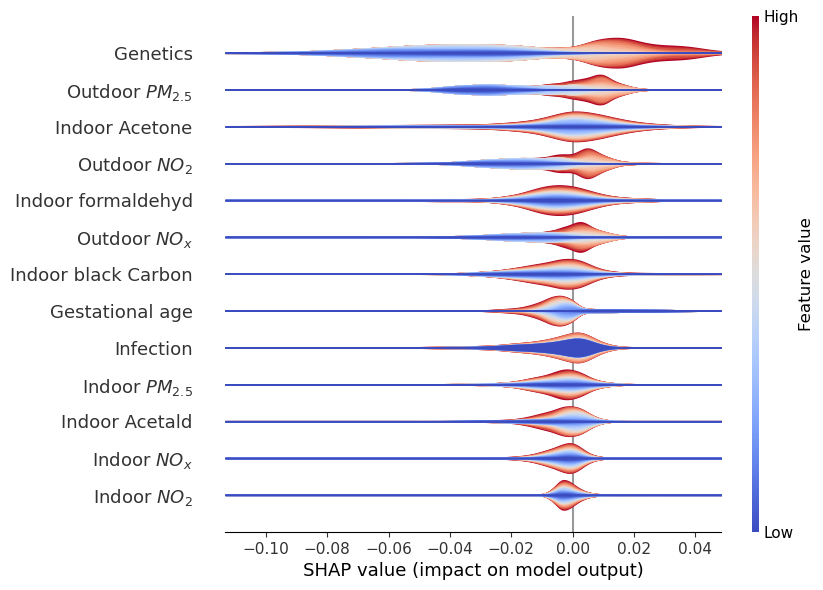

In [134]:
shap.plots.violin(s.values,X.loc[:,list_parameters] ,plot_type="layered_violin",max_display=40)


In [59]:
X_total.shape,s.shape

((411, 36), (411, 38))